In [1]:
import os
import sys
from glob import glob
import numpy as np
import pandas as pd
# import wfdb
# import biosignalsnotebooks as bsnb
# from wfdb import processing
from matplotlib import pyplot as plt
# from scipy import signal
# from biosppy.signals import ecg
np.set_printoptions(threshold=sys.maxsize)
import umap
import sklearn.utils as slu
# from sklearn.model_selection import LeaveOneOut

In [2]:
# from sklearn.manifold import TSNE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# store = '/Users/ruchira/Documents/lvl_4_project/lvl4-hons-project/mit-bih-arrhythmia-database-1.0.0/100'
# record = wfdb.rdrecord(store, sampto=100)
# # wfdb.plot_wfdb(record, title='Record 100 from MIT-BIH Arrhythmia database') 
# display(record.__dict__)

In [ ]:
# data, header = bsnb.load_signal("ecg_4000_Hz", get_header=True)

In [ ]:
# sig, fields = wfdb.rdsamp(store, channels=[0])
# xqrs = processing.XQRS(sig=sig[:,0], fs=fields['fs'])
# xqrs.detect()
# wfdb.plot_items(signal=sig, ann_samp=[xqrs.qrs_inds])

In [ ]:
# file_path = glob.glob('./mit-bih-arrhythmia-database-1.0.0/*.atr')
# files = [i[:-4] for i in file_path]
# files.sort()


# file = './mit-bih-arrhythmia-database-1.0.0/100'

# ann_ref = wfdb.rdann(file, 'atr')

# number_of_rpeaks = len(ann_ref.symbol)

# values = np.zeros((48,2))
# classes = ['N','R','L','V','A','E']
# for i in range(len(files)):
#     signals, fields = wfdb.rdsamp(files[i])
#     annotation = wfdb.rdann(files[i], 'atr')
#     for j in classes:
#         ids = np.in1d(annotation.symbol, j)
#         beats = annotation.sample[ids]
#         values[i] = [j,len(beats)]

# print(values)



# n = ['N']
# v = ['V']

# check_normal = np.in1d(ann_ref.symbol, n)
# check_v = np.in1d(ann_ref.symbol, v)

# normal_beats = ann_ref.sample[check_normal]
# v_beats = ann_ref.sample[check_v]

# print(len(check_normal))

# comparitor = processing.compare_annotations(ann_ref.sample[1:], xqrs.qrs_inds, int(0.1 * fields['fs']), sig[:,0])
# comparitor.print_summary()
# comparitor.plot()

In [ ]:

# def get_data(path):
#     file_path = glob(path)
#     files = [i[:-4] for i in file_path]
#     files.sort()
#     return files

## Histogram

In [ ]:

# print(len(get_data()))
# path = '/Users/ruchira/Documents/lvl_4_project/lvl4-hons-project/mit-bih-arrhythmia-database-1.0.0/*.atr'
# file_list = get_data(path)

# ann_list = []
# for i in range(len(file_list)): #going through each of the 48 files...
#     data_file = file_list[i] #one file of the 48
#     record = wfdb.rdsamp(data_file)  #returns an array of the sample
#     ann_ref = wfdb.rdann(data_file, 'atr') #reading annotations in the file
#     ann_list.extend(ann_ref.symbol)
    
# ann_array = np.array(ann_list)
# print(ann_array.shape)
# # annp = wfdb.rdann(file_list[7], 'atr')
# # print(len(annp.symbol))
# # print(annp.label_store)



# actual_beats = ['N','L','R','B','A','a','J','S','V','r',
#              'F','e','j','n','E','/','f','Q','?']

# ann_dict = {}

# for i in ann_array:
#     ann_dict[i] = ann_dict.get(i,0)+1

# ann_dict = {k:v for k,v in ann_dict.items() if k in actual_beats}


# plt.figure(figsize=(12,8))

# xlocs, xlabs = plt.xticks()

# bars = plt.bar(list(ann_dict.keys()), ann_dict.values(), width=.7)
# plt.title("Heart beat classification by annotation")
# xlocs = [i for i in ann_dict.keys()]
# ylabs = [i for i in ann_dict.values()]

# plt.xlabel("Annotations")
# plt.ylabel("Number of beats")

# for bar in bars:
#     yval = bar.get_height()
#     plt.text(bar.get_x(), yval + 300, yval)
    

# redundant code
# xlocs = [i/2 for i in range(len(ann_dict.keys()))]
# for i, v in enumerate(ann_dict.values()):
#     plt.text((xlocs[i] - 0.25, v + 0.01, str(v)))

# print(np.array(ann_ref.symbol).shape)
# print(record[1].get('fs'))
# print(record[0].shape)
# print(len(ann_ref.num)) #prints number of annotations (no of beats) 
# # num is the labelled annotation number for each annotation
# print(ann_ref.symbol)

## Visualising the Data per Patient

In [ ]:
#Visualising the data
# file_index = 0 #0 to 47 files in the database

# current_file = file_list[file_index]

# record = wfdb.rdsamp(current_file)
# ann_ref = wfdb.rdann(current_file, 'atr')



# samp_start = 0
# samp_end = 6500
# samples = samp_end - samp_start
# #picking first record, picking first channel, 
# #going from samp_start to samp_end in that channel
# channel = record[0][samp_start:samp_end, 1]
# #record is coming fromt the FIRST cell using the first file, change it there to see next file
# time = (np.arange(samples, dtype='float')+ samp_start)/record[1].get('fs')

# plt.figure(figsize=(20,10))
# plt.plot(time,channel)


# peak_location=np.logical_and(ann_ref.sample >= samp_start, ann_ref.sample < samp_end)
# #.sample returns a numpy array containing the annotation locations in samples relative to the beginning of the record
# #i.e., where each beat is
# anns = ann_ref.sample[peak_location] - samp_start
# ann_types = np.array(ann_ref.symbol)
# req_ann_types = ann_types[peak_location]
# print(ann_types.shape, req_ann_types.shape)


# ann_time = time[anns]
# plt.plot(ann_time, np.ones_like(ann_time)*channel.max()*1.4,'ro')


# for index, annotation in enumerate(anns):
#     plt.annotate(ann_types[index], xy = (time[annotation], channel.max()*1.1))

    
# plt.xlim([samp_start / record[1].get('fs'), (samp_end/record[1].get('fs'))+1])
# plt.xlabel('offset')
# plt.ylabel(record[1].get('sig_name')[1])
# plt.show()
# q = np.array([[1,2,3,4,5,6],[7,8,9,10,11,12]])
# print(q.shape)
# for i, z in enumerate(q):
#     print(z)

In [ ]:

# for file in file_list:
#     path = file.split('/')
#     fn = path[-1]
#     record = wfdb.rdsamp(file)
#     ecg_val = record[0].T
#     ann_ref = wfdb.rdann(file,'atr')

#     ann_list = np.array(ann_ref.symbol)
#     ann_number = np.zeros_like(ann_list, dtype='float')
    
#     for annid, anno in enumerate(ann_list):
#         if anno == 'N':
#             ann_number[annid] = 1.0
#         elif anno == 'L':
#             ann_number[annid] = 2.0
#         elif anno == 'R':
#             ann_number[annid] = 3.0
#         elif anno == 'A':
#             ann_number[annid] = 4.0
#         elif anno == 'V':
#             ann_number[annid] = 5.0
#         elif anno == 'F':
#             ann_number[annid] = 6.0
#         elif anno == 'f':
#             ann_number[annid] = 7.0
#         elif anno == '/':
#             ann_number[annid] = 8.0
#     all_ann_numbers = np.zeros_like(ecg_val[0], dtype='float')
#     all_ann_numbers[ann_ref.sample] = ann_number

#     for ch_id, channel in enumerate(ecg_val): #enumerates the 2 channels - so 0 and 1
#         channel_name = record[1].get('sig_name')[ch_id]
#         print("ECG channel: ", channel_name)
        
#         ecg_output = ecg.ecg(signal=channel, sampling_rate=360, show=False)
#         rpeaks = np.zeros_like(channel, dtype='float')
#         rpeaks[ecg_output['rpeaks']] = 1.0
        

#         all_beats = np.array(np.split(channel, ecg_output['rpeaks']))

#         remove_beats = [0]
#         for i, i_val in enumerate(ecg_output['rpeaks']):
#             first = i == 0
#             last = i == len(all_beats) - 1
            
#             if first or last:
#                 continue
            
#             if i_val < 10:
#                 from_i = 0
#             else:
#                 from_i = i_val - 10
#             to_i = i_val + 10
#             anno = all_ann_numbers[from_i:to_i].max()
            
#             if anno == 0.0:
#                 remove_beats = np.append(remove_beats, i)
#                 continue
            
#             all_beats[i] = np.append(all_beats[i][150:], all_beats[i+1][:185])
            
#             # standardise the data
#             all_beats[i] = (all_beats[i]-np.mean(all_beats[i]))/np.std(all_beats[i])

# #             newsize = int((all_beats[i].size * 125 / 360))
# #             all_beats[i] = signal.resample(all_beats[i], newsize)
# #             print(all_beats[i].shape)
#             if all_beats[i].size > 430:
#                 remove_beats = np.append(remove_beats, i) #here is the problem! removing all beats when frequency is not resampled why?
#                 continue
            
#             zerocount = 430 - all_beats[i].size
#             all_beats[i] = np.pad(all_beats[i], (0, zerocount), 'constant', constant_values=(0.0, 0.0))
#           #  print(all_beats[i].shape)
            
#             all_beats[i] = np.append(all_beats[i], anno)
#             # print(all_beats[i].shape)
#             all_beats[i] = np.append(all_beats[i], fn)
#            # print(all_beats[i].shape)
#             all_beats[i] = np.append(all_beats[i], ch_id)
#         remove_beats = np.append(remove_beats, len(all_beats)-1)
# #         print(remove_beats.shape)
#         all_beats = np.delete(all_beats, remove_beats)
#         #print(all_beats.shape)
#         savedata = np.array(list(all_beats[:]), dtype=np.float)
        
#         outfn = 'data_ecg/'+fn+'_'+channel_name+'.csv'
#         print('    Generating ', outfn)
#         if not os.path.exists('data_ecg/'):
#             os.makedirs('data_ecg/')
#         with open(outfn, "wb") as fin:
#             np.savetxt(fin, savedata, delimiter=",", fmt='%f')
            
    

In [2]:
all_data = np.empty(shape=[0,433])
print(all_data.shape)
# csv_files = glob('./drive/My Drive/ecg/data_ecg/*.csv')
csv_files = glob('./data_ecg/*.csv')

for file in  csv_files:
    heartbeat = np.loadtxt(file, delimiter=',')
    all_data = np.append(all_data, heartbeat, axis=0)

print("loaded all data")
print(all_data.shape)

(0, 433)
loaded all data
(145842, 433)


## Visualise the heartbeats

In [ ]:
# data = np.loadtxt('/Users/ruchira/Documents/lvl_4_project/lvl4-hons-project/data_ecg/100_MLII.csv', delimiter=',')
# for beat_num in [0,1,2,3,4,5,6,7]:
#     time_value = np.arange(430, dtype = 'float') / 430
#     current_beat = data[beat_num][:-3]
#     ann_num = data[beat_num][-3]
#     plt.figure(figsize=(20,5))
#     plt.plot(time_value, current_beat)
#     plt.xlabel('Time in seconds')
#     plt.ylabel('beat number: ' + str(beat_num) + ' type of beat: ' + str(ann_num))

In [3]:
shuffled_all = all_data
np.random.shuffle(shuffled_all)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(shuffled_all[:,:-3], shuffled_all[:,-3], test_size=0.25)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(109381, 430)
(36461, 430)
(109381,)
(36461,)


In [6]:
X_train_file = './train_test_imbal/X_train.csv'
y_train_file = './train_test_imbal/y_train.csv'
X_test_file = './train_test_imbal/X_test.csv'
y_test_file = './train_test_imbal/y_test.csv'



with open(X_train_file, 'wb') as f:
    np.savetxt(f, X_train, delimiter=",", fmt='%f')
with open(y_train_file, 'wb') as f:
    np.savetxt(f, y_train, delimiter=",", fmt='%f')
with open(X_test_file, 'wb') as f:
    np.savetxt(f, X_test, delimiter=",", fmt='%f')
with open(y_test_file, 'wb') as f:
    np.savetxt(f, y_test, delimiter=",", fmt='%f')
# Create a cell to load data from files below this!!!!!


In [7]:
X_train = np.loadtxt('./train_test_imbal/X_train.csv', delimiter=',')
y_train = np.loadtxt('./train_test_imbal/y_train.csv', delimiter=',')
X_test = np.loadtxt('./train_test_imbal/X_test.csv', delimiter=',')
y_test = np.loadtxt('./train_test_imbal/y_test.csv', delimiter=',')

KeyboardInterrupt: 

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

## SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
label_count = Counter(y_train)
print(label_count)
classes, counts = np.unique(y_train, return_counts=True)
imbalanced = counts[1:]
imb_max = np.max(imbalanced)
print(imb_max)
normal_count = counts[0]
print(normal_count)

Counter({1.0: 76705, 8.0: 7306, 3.0: 6185, 2.0: 4759, 5.0: 3578, 4.0: 2360, 7.0: 1199, 6.0: 598})
7306
76705


In [ ]:
samp_strat = {1:normal_count,2:imb_max,3:imb_max,4:imb_max,5:imb_max,6:imb_max,7:imb_max,8:imb_max}
sm = SMOTE(random_state=42, sampling_strategy=samp_strat)
X_bal, y_bal = sm.fit_resample(X_train,y_train)
print(Counter(y_bal))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Counter({1.0: 76705, 2.0: 7306, 5.0: 7306, 3.0: 7306, 4.0: 7306, 8.0: 7306, 7.0: 7306, 6.0: 7306})


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X_u,y_u = rus.fit_resample(X_bal,y_bal)

print(Counter(y_u))

Counter({1.0: 7306, 2.0: 7306, 3.0: 7306, 4.0: 7306, 5.0: 7306, 6.0: 7306, 7.0: 7306, 8.0: 7306})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


## CF Matrix and Scores Functions

In [ ]:
from sklearn.metrics import *
import seaborn as sns
def cf_matrix_func(predictions, y_test):
    cm = confusion_matrix(y_test, predictions)
    categories=['N', 'L', 'R', 'A', 'V', 'F', 'f','P']
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    sns.heatmap(cm, annot=True, 
                fmt='.2%', cmap='Blues',xticklabels=categories,yticklabels=categories)
    plt.xlabel('predicted label')
    plt.ylabel('true label')
    
def scores(predictions, y_test):
  accuracy = accuracy_score(y_test, predictions)
  precision_micro = precision_score(y_test, predictions, average='micro', labels=[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0,8.0])
  precision_macro = precision_score(y_test, predictions, average='macro', labels=[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0,8.0])
  f1_macro = f1_score(y_test, predictions, average='macro', labels=[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0,8.0])
  f1_micro = f1_score(y_test, predictions, average='micro', labels=[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0,8.0])
  return accuracy, precision_macro, precision_micro, f1_macro, f1_micro

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_u, y_u)
# print(model.score(X_test, y_test))
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [ ]:
pred_xgb = model.predict(X_test)

(0.7315298997984283, 0.49896891472281774, 0.7315298997984283, 0.574314895155899, 0.7315298997984283)


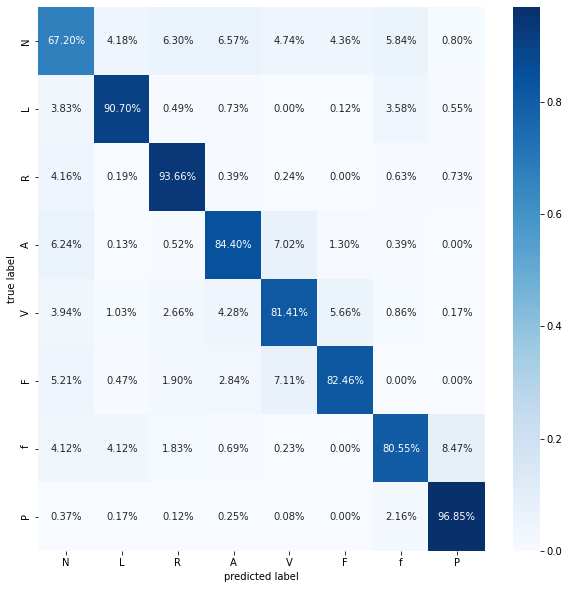

In [ ]:
print(scores(pred_xgb, y_test))
cf_matrix_func(pred_xgb, y_test)

In [ ]:
from keras.utils.np_utils import to_categorical
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D

In [ ]:
X_train_3d = X_u.reshape(-1, X_u.shape[1],1)
X_test_3d = X_test.reshape(-1, X_test.shape[1], 1)

print(X_train_3d.shape)
print(X_test_3d.shape)

y_train_cat = to_categorical(y_u)
y_test_cat = to_categorical(y_test)
print(y_train_cat.shape)
print(y_test_cat.shape)

(58448, 430, 1)
(34231, 430, 1)
(58448, 9)
(34231, 9)


In [ ]:
verbose, epoch, batch_size = 1, 50, 128

def getModel():
    cnnmodel = Sequential()
    cnnmodel.add(Conv1D(filters=128, kernel_size=2, activation='relu',input_shape=(X_train_3d.shape[1],X_train_3d.shape[2])))
    cnnmodel.add(MaxPooling1D(pool_size=2))
    cnnmodel.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
    cnnmodel.add(MaxPooling1D(pool_size=2))
    cnnmodel.add(Conv1D(filters=32, kernel_size=2, activation='relu'))
    cnnmodel.add(MaxPooling1D(pool_size=2))
    cnnmodel.add(Conv1D(filters=16, kernel_size=2, activation='relu'))
    cnnmodel.add(MaxPooling1D(pool_size=2))
    cnnmodel.add(Dropout(rate=0.2))
    cnnmodel.add(Flatten())
    cnnmodel.add(Dense(64, activation='relu'))
    cnnmodel.add(Dense(32, activation='relu'))
    cnnmodel.add(Dense(9, activation='softmax'))
    cnnmodel.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
    cnnmodel.summary()
    return cnnmodel

cnnmodel = getModel()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 429, 128)          384       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 214, 128)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 213, 64)           16448     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 106, 64)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 105, 32)           4128      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 52, 32)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 51, 16)            1

In [ ]:
model = cnnmodel.fit(X_train_3d, y_train_cat, epochs=epoch, verbose=verbose,batch_size=batch_size)

Epoch 1/50
457/457 [==============================] - 76s 167ms/step - loss: 0.6662 - accuracy: 0.7713
Epoch 2/50
457/457 [==============================] - 79s 174ms/step - loss: 0.2991 - accuracy: 0.9012
Epoch 3/50
457/457 [==============================] - 76s 167ms/step - loss: 0.2258 - accuracy: 0.9241
Epoch 4/50
457/457 [==============================] - 77s 168ms/step - loss: 0.1908 - accuracy: 0.9349
Epoch 5/50
457/457 [==============================] - 77s 168ms/step - loss: 0.1708 - accuracy: 0.9427
Epoch 6/50
457/457 [==============================] - 77s 169ms/step - loss: 0.1497 - accuracy: 0.9487
Epoch 7/50
457/457 [==============================] - 77s 169ms/step - loss: 0.1388 - accuracy: 0.9526
Epoch 8/50
457/457 [==============================] - 77s 169ms/step - loss: 0.1268 - accuracy: 0.9566
Epoch 9/50
457/457 [==============================] - 77s 169ms/step - loss: 0.1181 - accuracy: 0.9600
Epoch 10/50
457/457 [==============================] - 78s 170ms/step - l

In [ ]:
cnnpredictions = cnnmodel.predict(X_test_3d, verbose=1)

1070/1070 [==============================] - 14s 13ms/step


In [ ]:
cnn_predict = np.argmax(cnnpredictions, axis=1)
true_value = np.argmax(y_test_cat,axis=1)

(0.9600654377610938, 0.9439720061559647, 0.9600654377610938, 0.8704688858349104, 0.9600654377610938)


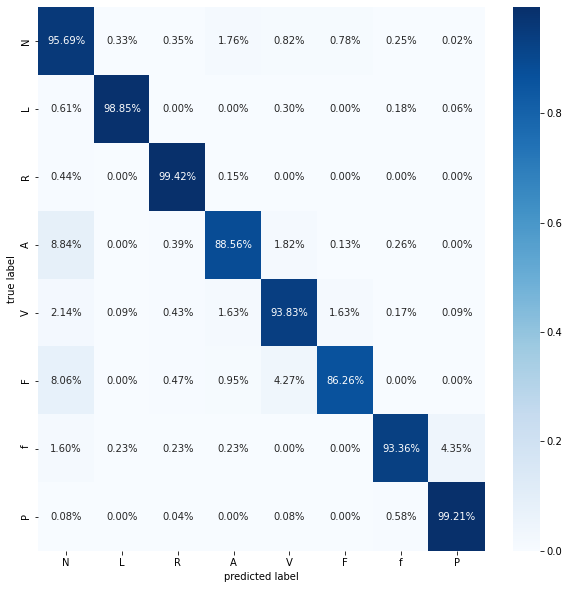

In [ ]:
score = scores(true_value, cnn_predict)
print(score)
cf_matrix_func(cnn_predict,true_value)